In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

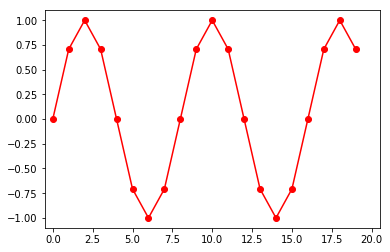

In [2]:
s = np.sin(2 * np.pi * 0.125 * np.arange(20))
plt.plot(s, 'ro-')
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.show()

#### Keras 에서 RNN 사용시 입력 데이터: (nb_samples, timesteps, input_dim)
- nb_samples: 자료의 수
- timesteps: 순서열의 길이
- input_dim: x 벡터의 크기

In [3]:
from scipy.linalg import toeplitz
S = np.fliplr(toeplitz(np.r_[s[-1], np.zeros(s.shape[0] - 2)], s[::-1]))
S[:5, :3]

array([[ 0.00000000e+00,  7.07106781e-01,  1.00000000e+00],
       [ 7.07106781e-01,  1.00000000e+00,  7.07106781e-01],
       [ 1.00000000e+00,  7.07106781e-01,  1.22464680e-16],
       [ 7.07106781e-01,  1.22464680e-16, -7.07106781e-01],
       [ 1.22464680e-16, -7.07106781e-01, -1.00000000e+00]])

In [4]:
X_train = S[:-1, :3][:, :, np.newaxis]
Y_train = S[:-1, 3]
X_train.shape, Y_train.shape

((18, 3, 1), (18,))

In [14]:
X_train[:4].round(3)

array([[[ 0.   ],
        [ 0.707],
        [ 1.   ]],

       [[ 0.707],
        [ 1.   ],
        [ 0.707]],

       [[ 1.   ],
        [ 0.707],
        [ 0.   ]],

       [[ 0.707],
        [ 0.   ],
        [-0.707]]])

In [13]:
Y_train[:4].round(3)

array([ 0.707,  0.   , -0.707, -1.   ])

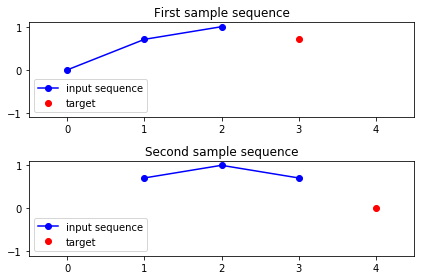

In [7]:
plt.subplot(211)
plt.plot([0, 1, 2], X_train[0].flatten(), 'bo-', label="input sequence")
plt.plot([3], Y_train[0], 'ro', label="target")
plt.xlim(-0.5, 4.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("First sample sequence")
plt.subplot(212)
plt.plot([1, 2, 3], X_train[1].flatten(), 'bo-', label="input sequence")
plt.plot([4], Y_train[1], 'ro', label="target")
plt.xlim(-0.5, 4.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("Second sample sequence")
plt.tight_layout()
plt.show()

In [8]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

np.random.seed(0)
model = Sequential()
model.add(SimpleRNN(10, input_shape=(3, 1)))
model.add(Dense(1, activation="linear"))
model.compile(loss='mse', optimizer='sgd')

Using TensorFlow backend.
W0813 14:37:54.110305  5288 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0813 14:37:54.123305  5288 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0813 14:37:54.125305  5288 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0813 14:37:54.222311  5288 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



- 학습 시키기 전의 모습

W0813 14:38:48.214153  5288 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:2741: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

W0813 14:38:48.216153  5288 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.



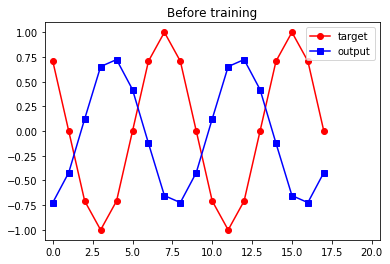

In [9]:
plt.plot(Y_train, 'ro-', label="target")
plt.plot(model.predict(X_train[:, :, :]), 'bs-', label="output")
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("Before training")
plt.show()

In [10]:
history = model.fit(X_train, Y_train, epochs=100, verbose=1)

Epoch 1/100
18/18 [==============================] - 0s 6ms/step - loss: 1.3777
Epoch 2/100
18/18 [==============================] - 0s 56us/step - loss: 1.3081
Epoch 3/100
18/18 [==============================] - 0s 111us/step - loss: 1.2435
Epoch 4/100
18/18 [==============================] - 0s 56us/step - loss: 1.1836
Epoch 5/100
18/18 [==============================] - 0s 167us/step - loss: 1.1277
Epoch 6/100
18/18 [==============================] - 0s 111us/step - loss: 1.0756
Epoch 7/100
18/18 [==============================] - 0s 56us/step - loss: 1.0269
Epoch 8/100
18/18 [==============================] - 0s 56us/step - loss: 0.9813
Epoch 9/100
18/18 [==============================] - 0s 56us/step - loss: 0.9385
Epoch 10/100
18/18 [==============================] - 0s 111us/step - loss: 0.8983
Epoch 11/100
18/18 [==============================] - 0s 56us/step - loss: 0.8604
Epoch 12/100
18/18 [==============================] - 0s 56us/step - loss: 0.8246
Epoch 13/100
18/18 [==

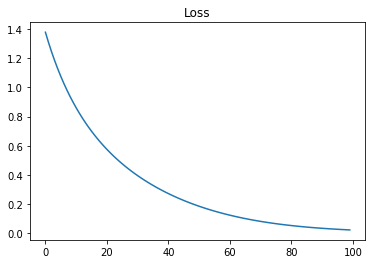

In [11]:
plt.plot(history.history["loss"])
plt.title("Loss")
plt.show()

- 학습 시킨 후의 모습

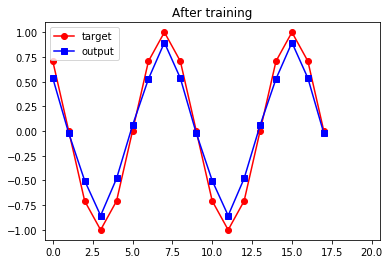

In [12]:
plt.plot(Y_train, 'ro-', label="target")
plt.plot(model.predict(X_train[:, :, :]), 'bs-', label="output")
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("After training")
plt.show()